In [1]:
import pandas as pd
import numpy as np
import featSelect_speed as fs
All_df=pd.DataFrame()
import os
import sys
import reshape
from statistics import mean
#import other python scripts for further anlaysis
# Initialization of directory information:
#thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/results/rdmNetwork/'
#generate log sample
#1000 points for log selection
#loop through 125 times to generate 8*125=1000 samples per log point
featureSize=np.logspace(1, 4.7, num=39,dtype=int)
for i in range(100):
    for number in featureSize:
        #generate a new index
        idx=np.random.randint(55278, size=(number))
        All=fs.modelAll(idx)
        All['feature']=number
        All_df=pd.concat([All_df,All])
    print('Finished with '+str(i)+' in iteration 100')
All_df.to_csv(outDir+'ALL/acc.csv', index=False)

Finished with 0 in iteration 100
Finished with 1 in iteration 100
Finished with 2 in iteration 100
Finished with 3 in iteration 100
Finished with 4 in iteration 100
Finished with 5 in iteration 100
Finished with 6 in iteration 100
Finished with 7 in iteration 100
Finished with 8 in iteration 100
Finished with 9 in iteration 100
Finished with 10 in iteration 100
Finished with 11 in iteration 100
Finished with 12 in iteration 100
Finished with 13 in iteration 100
Finished with 14 in iteration 100
Finished with 15 in iteration 100
Finished with 16 in iteration 100
Finished with 17 in iteration 100
Finished with 18 in iteration 100
Finished with 19 in iteration 100
Finished with 20 in iteration 100
Finished with 21 in iteration 100
Finished with 22 in iteration 100
Finished with 23 in iteration 100
Finished with 24 in iteration 100
Finished with 25 in iteration 100
Finished with 26 in iteration 100
Finished with 27 in iteration 100
Finished with 28 in iteration 100
Finished with 29 in iter

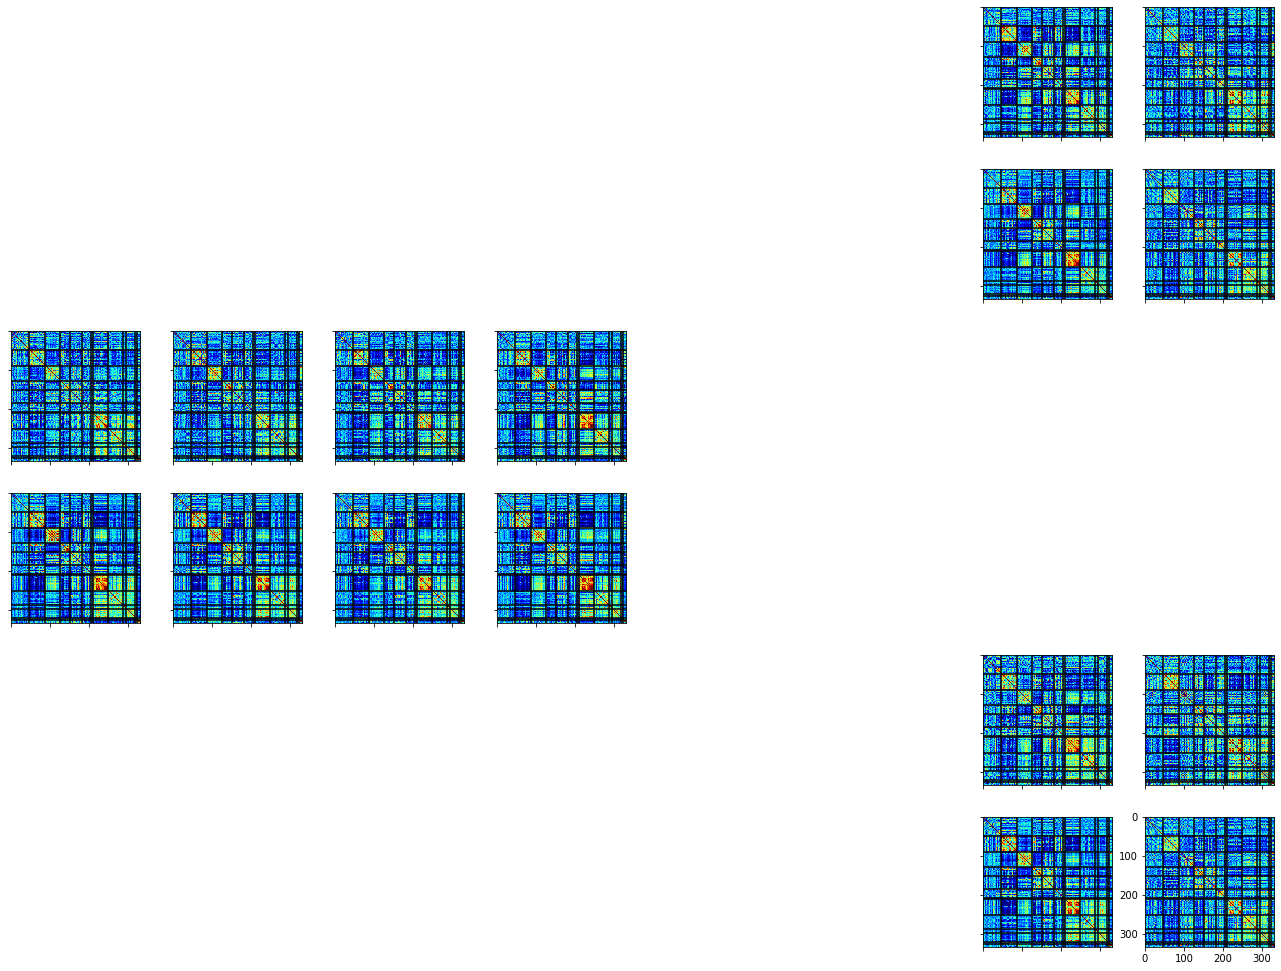

In [4]:
fig=plt.figure(figsize=(30,15))#, constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=6, ncols=9, width_ratios=[1, 1, 1,1, 1, 1,1, 1,1],
                       wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)#, wspace=0.9, hspace=0.1)
#gs.update(wspace=0.05, hspace=0.01, left = 0.15, right = 0.7, bottom = 0.1, top = 0.9) 

for i in range(5):
    corrmat=fileFC[:,:,i]
    if i != 4:
    # main figure plotting
        ax=fig.add_subplot(gs[2,i])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=1,interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
        
    else:
        ax=fig.add_subplot(gs[0,6])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=1,interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
for i in range(5):
    corrmat=restFC[:,:,i]
    if i!=4:
        # main figure plotting
        ax=fig.add_subplot(gs[3,i])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
    else:
        ax=fig.add_subplot(gs[1,6])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()

corrmat=DS[:,:,1]
ax=fig.add_subplot(gs[0,7])
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
cbar.remove()


corrmat=restDiff[:,:,1]
ax=fig.add_subplot(gs[1,7])
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
cbar.remove()



corrmat=SS[:,:,1]
ax=fig.add_subplot(gs[4,6])
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
cbar.remove()

corrmat=restFC[:,:,1]
ax=fig.add_subplot(gs[5,6])
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
cbar.remove()



#BS
corrmat=BS[:,:,1]
ax=fig.add_subplot(gs[4,7])
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
cbar.remove()

corrmat=restDiff[:,:,1]
ax=fig.add_subplot(gs[5,7])
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')

cbar.remove()
#plt.savefig(thisDir+'output/FigsFinal/CrossVal_example.png', bbox_inches='tight')




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


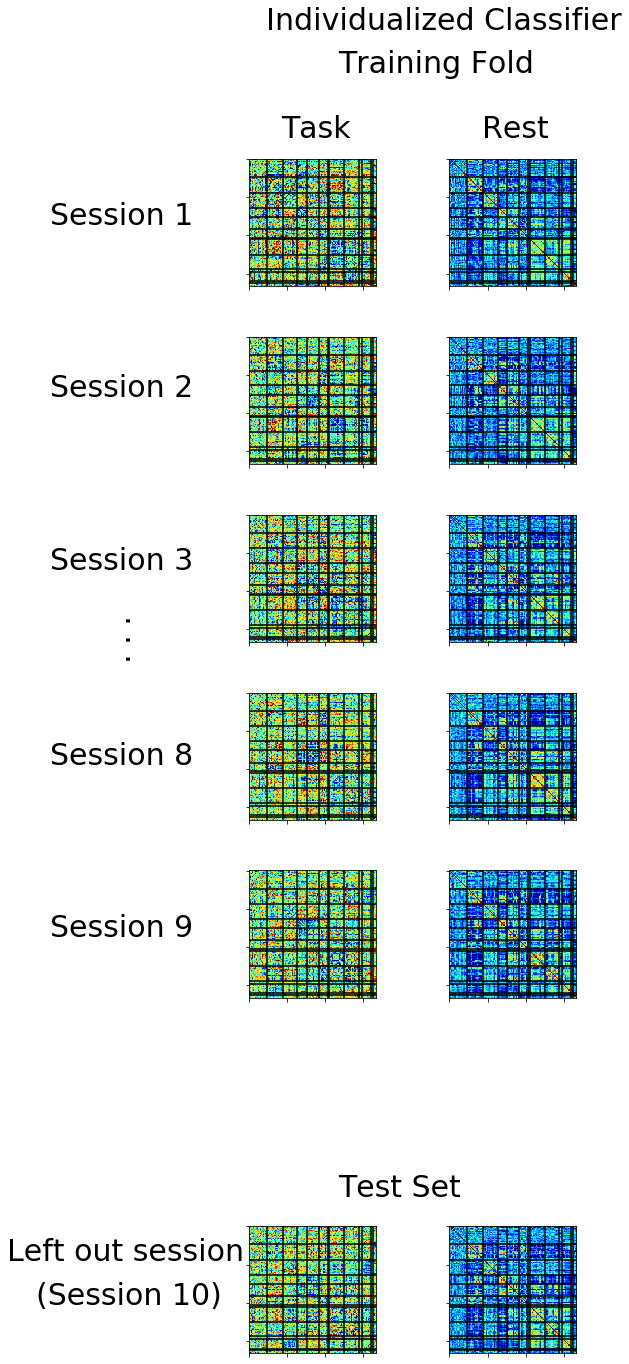

In [5]:
fig=plt.figure(figsize=(20,30), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=10, ncols=4)#, wspace=0.9, hspace=0.1)
gs.update(wspace=0.05, hspace=0.4, left = 0.15, right = 0.7, bottom = 0.1, top = 0.9) 
fig.text(.18, .96, 'Individualized Classifier',fontsize=30)
#fig.text(.2, .96, 'Same Subject',fontsize=40)
fig.text(.23, .94, 'Training Fold',fontsize=30)
fig.text(.19, .91, 'Task',fontsize=30)
fig.text(.33, .91, 'Rest',fontsize=30)
#fig.text(.2, .64, 'Fold 1',fontsize=40)
#fig.text(.3,.44, 'Same Subject', fontsize=40)
fig.text(.23, .42, 'Test Set',fontsize=30)
#fig.text(.45, .5, 'Task',fontsize=30)
#fig.text(.6, .5, 'Rest',fontsize=30)
#plt.arrow(.23, .62, .15, 0, width = 0.01)  
fig.text(.03, .87, 'Session 1',fontsize=30)
fig.text(.03, .79, 'Session 2',fontsize=30)
fig.text(.03, .71, 'Session 3',fontsize=30)
fig.text(.03, .62, 'Session 8',fontsize=30)
fig.text(.03, .54, 'Session 9',fontsize=30)
fig.text(.07, .67, '. . .',fontsize=30,rotation='vertical')
fig.text(.00001, .39, 'Left out session',fontsize=30)
fig.text(.02, .37,'(Session 10)',fontsize=30)

for i in range(6):
    corrmat=fileFC[:,:,i]
    if i != 5:
    # main figure plotting
        ax=fig.add_subplot(gs[i,0])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=.4,interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
        
    else:
        ax=fig.add_subplot(gs[6,0])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=.4,interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
for i in range(6):
    corrmat=restFC[:,:,i]
    if i!=5:
        # main figure plotting
        ax=fig.add_subplot(gs[i,1])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()
    else:
        ax=fig.add_subplot(gs[6,1])
        im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='jet',vmin=-.4,vmax=1, interpolation='none')
        cbar=plt.colorbar(im)

        # add some lines between networks
        for tr in Parcel_params['transitions']:
            ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
            ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        cbar.remove()

plt.savefig(thisDir+'output/FigsFinal/CrossVal_example.png', bbox_inches='tight')




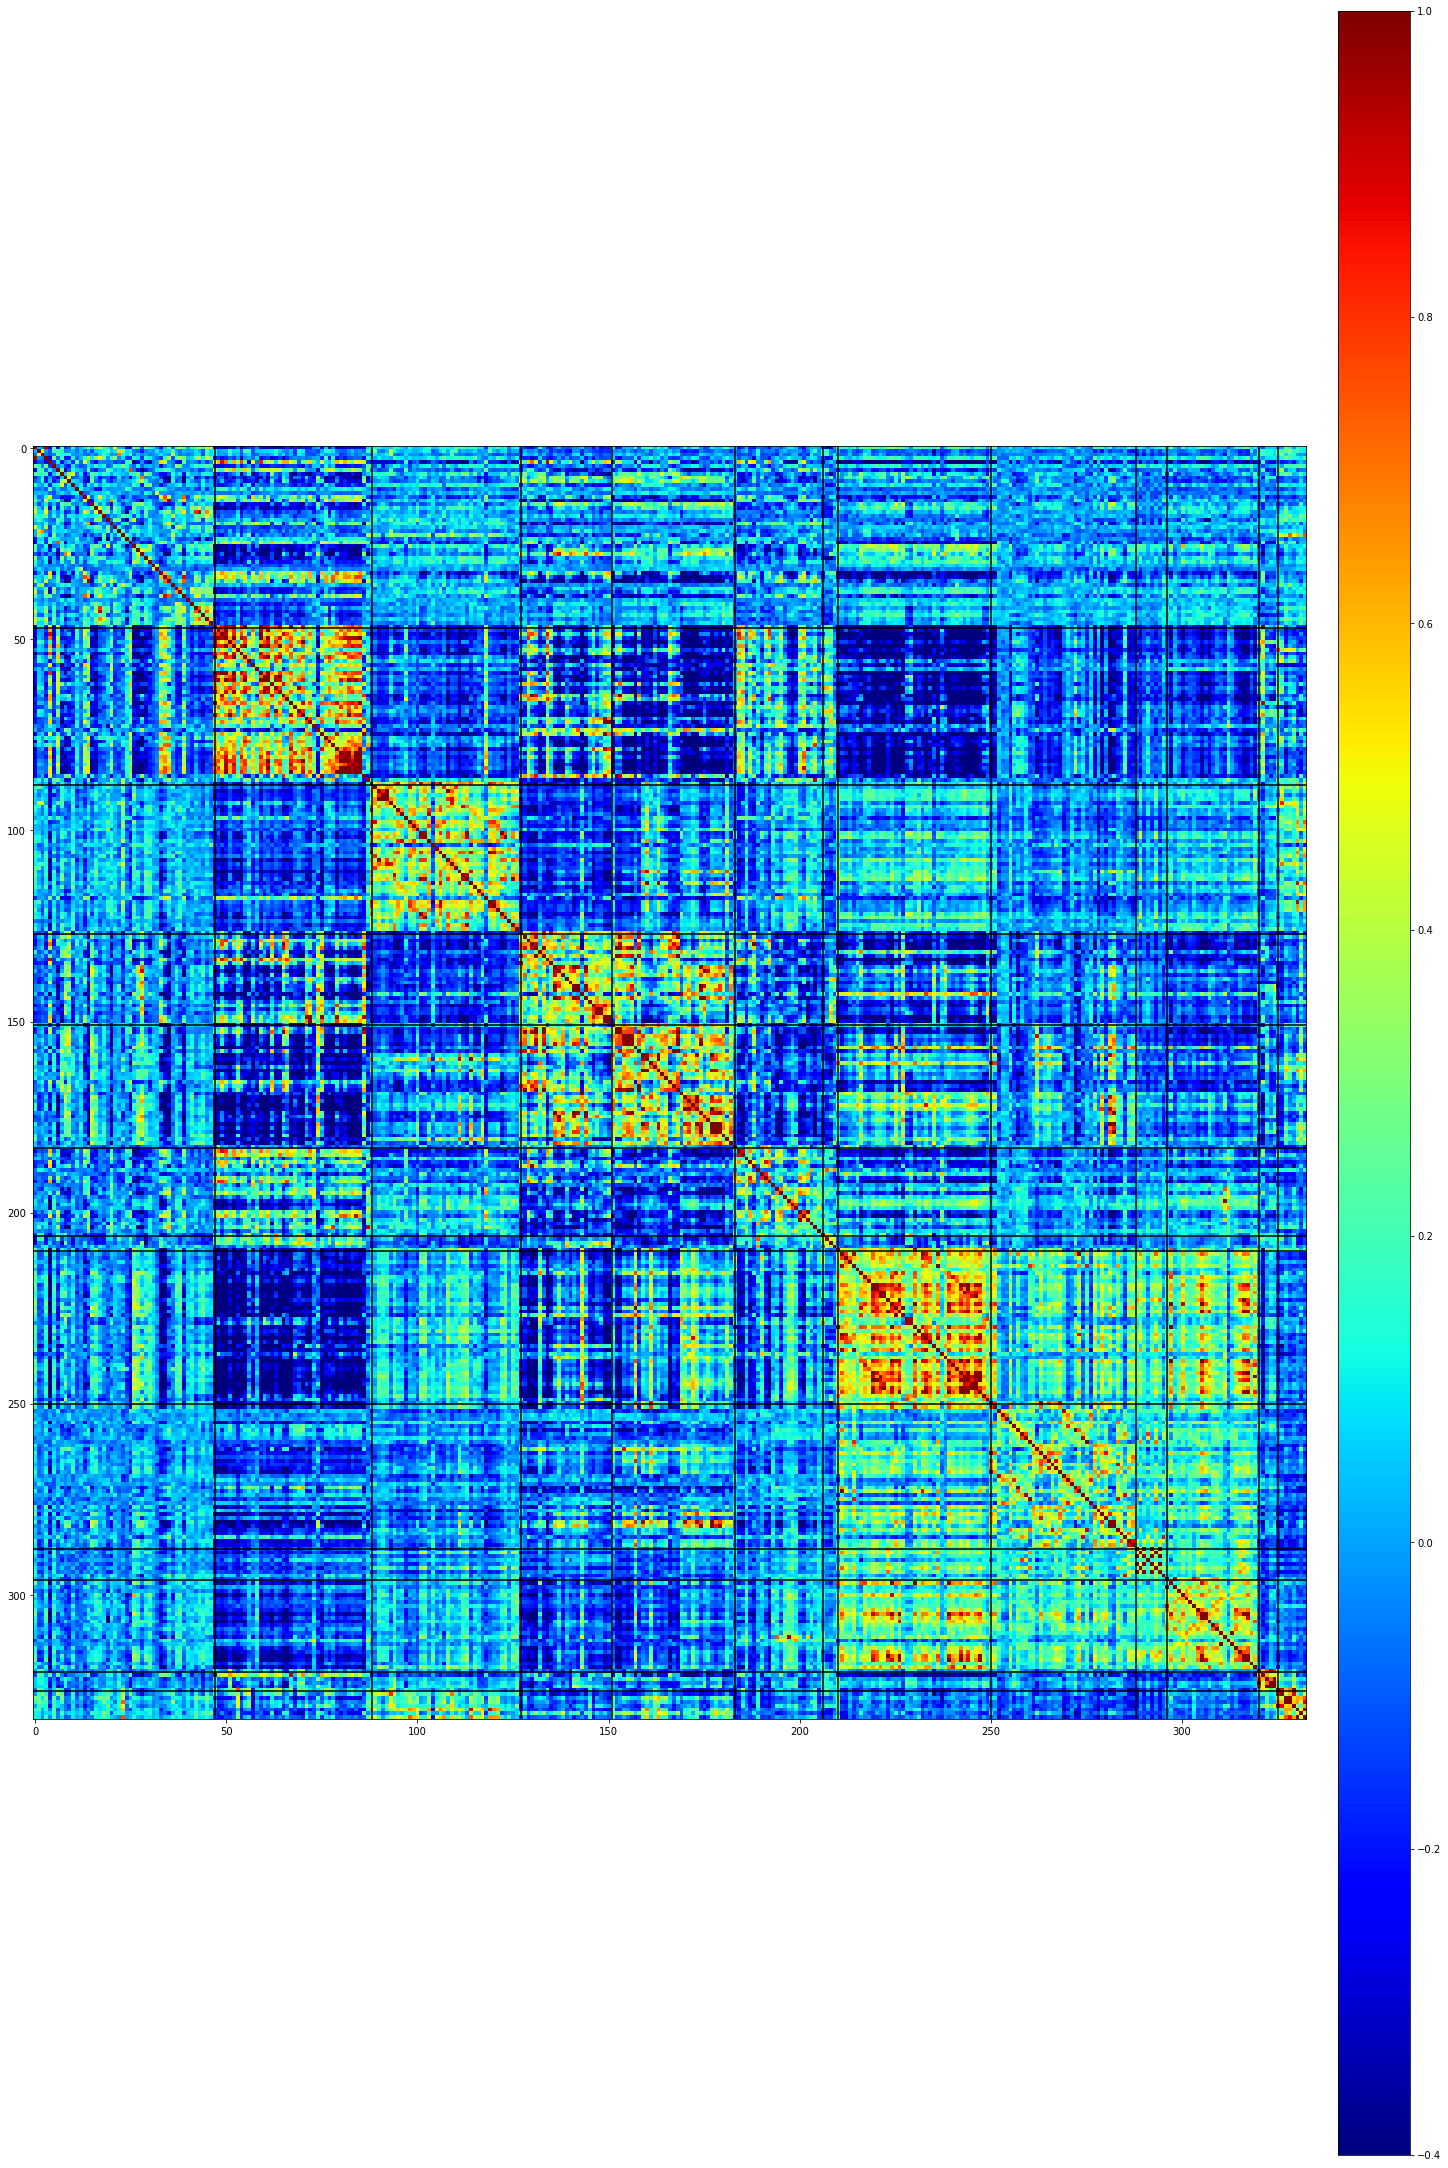

In [8]:
fig=plt.figure(figsize=(20,30), constrained_layout=True)
ax=fig.add_subplot()
corrmat=restFC[:,:,1]
im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap="jet",vmin=-.4,vmax=1,interpolation='none')
cbar=plt.colorbar(im)

# add some lines between networks
for tr in Parcel_params['transitions']:
    ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
    ax.axvline(tr,0,Parcel_params['num_rois'],color='k')
#plt.setp(ax.get_xticklabels(), visible=False)
#plt.setp(ax.get_yticklabels(), visible=False)

In [30]:
import reshape
df=reshape.permROI('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/MSC03_parcel_corrmat.mat')
indices=reshape.getIndices()

In [16]:
index=indices.index
condition=indices['level_0']=='unassign'
unassign=index[condition]
unassign_list=unassign.tolist()

In [22]:
foo=df[:,unassign_list]

In [25]:
import numpy as np
bar=np.random.permutation(foo)

In [28]:
df[:,unassign_list]=bar

In [29]:
df

array([[-0.06689679,  0.06783064,  0.1371752 , ...,  0.15989449,
         0.615936  ,  0.45628314],
       [ 0.30475749,  0.20692849,  0.02036696, ...,  0.18712321,
         0.77881681,  0.14116136],
       [-0.00125195,  0.27164414,  0.19473049, ...,  0.43735183,
         0.85253346,  0.06363337],
       ...,
       [ 0.14428941,  0.49785404,  0.30755917, ...,  0.50637308,
         0.89490481,  0.53692926],
       [-0.07211741, -0.17260513,  0.35424963, ...,  0.38206094,
         0.91486397, -0.06592948],
       [-0.04726797, -0.01968044,  0.21200347, ...,  1.03541348,
        -0.19760946, -0.10589446]])

In [75]:
from sklearn.model_selection import LeaveOneOut
import pandas as pd
#subList=dict([(1,'MSC01'),(2,'MSC02'),(3,'MSC03'),(4,'MSC04'),(5,'MSC05'),(6,'MSC06'),(7,'MSC07'),(8,'MSC10')])
data=np.array(['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'],dtype='<U61')
loo = LeaveOneOut()
for  test, train in loo.split(data): #train on one sub test on the rest
    tmp=pd.DataFrame()
    train_sub=data[train]
    test_sub=data[test]
       
    

In [72]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

In [77]:
test_sub.shape

(7,)

In [1]:
import featSelection
featSelection.classifyAll()

In [1]:
import permuteROI
permuteROI.classifyAll()

In [2]:
import permuteROI
res=permuteROI.modelAll_byRow('MSC01')

res.tofile('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/permutation/ALL/MSC01_Row.csv', sep = ',')

In [1]:
import quest_feat_script
quest_feat_script.runScript()

KeyboardInterrupt: 

In [ ]:
import seperate_task as s
#seperate_task.modelAll()
s.DSmodel()


In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import RidgeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import itertools
import scipy.io
import random
from sklearn.model_selection import KFold
import os
import sys
import reshape
import seperate_task as s
from statistics import mean
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/results/acc/'
taskList=['semantic','glass', 'motor','mem']
data=np.array(['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'],dtype='<U61')
loo = LeaveOneOut()
taskData=np.array(['semantic','glass', 'motor','mem'], dtype='<U61')
clf=RidgeClassifier()
master_df=pd.DataFrame()
data=np.array(['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'],dtype='<U61')
loo = LeaveOneOut()
for testTask, trainTask in loo.split(taskData):
    testT=taskData[testTask]
    trainT=taskData[trainTask]
    task_tmp=pd.DataFrame()
    for test, train in loo.split(data): #train on one sub test on the rest
        tmp=pd.DataFrame()
        train_sub=data[train]
        test_sub=data[test]
    #train sub
        taskFC=reshape.matFiles(dataDir+trainT[0]+'/'+train_sub[0]+'_parcel_corrmat.mat')
        restFC=reshape.matFiles(dataDir+'rest/'+train_sub[0]+'_parcel_corrmat.mat') #keep tasks seperated in order to collect the right amount of days
        test_taskFC,test_restFC=s.AllSubFiles_BS(test_sub,testT)
        same_Tsub, same_Rsub, diff_Tsub, diff_Rsub=s.folds(clf, taskFC,restFC, test_taskFC,test_restFC)
        tmp['train']=train_sub
        tmp['task']=trainT
        tmp['same_subT']=same_Tsub
        tmp['same_subR']=same_Rsub
        tmp['diff_subT']=diff_Tsub
        tmp['diff_subR']=diff_Rsub
        master_df=pd.concat([master_df,tmp])

In [2]:
master_df

,train,task,same_subT,same_subR,diff_subT,diff_subR
0,MSC01,semantic,0.900000,1.0,0.140777,0.998000
0,MSC02,semantic,0.900000,1.0,0.019417,0.999000
0,MSC03,semantic,0.800000,1.0,0.002885,1.000000
0,MSC04,semantic,0.900000,1.0,0.087379,1.000000
0,MSC05,semantic,0.900000,1.0,0.284466,1.000000
0,MSC06,semantic,0.900000,1.0,0.177295,0.993000
0,MSC07,semantic,1.000000,1.0,0.004369,1.000000
0,MSC10,semantic,0.800000,1.0,0.269268,0.999000
0,MSC01,glass,0.800000,1.0,0.214078,1.000000
0,MSC02,glass,0.600000,1.0,0.013592,1.000000


In [20]:
tmp['diff_subR']=diff_Rsub

In [29]:
tmp

,train,same_subT,diff_subT,same_subR,diff_subR
0,MSC10,0.975,0.996364,0.95,0.1975


In [8]:
test_restFC.shape

(100, 55278)

In [24]:
master_df=pd.DataFrame()
data=np.array(['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'],dtype='<U61')
loo = LeaveOneOut()
for  test, train in loo.split(data): #train on one sub test on the rest
    tmp=pd.DataFrame()
    train_sub=data[train]
    test_sub=data[test]
#train sub
    memFC=reshape.matFiles(dataDir+'mem/'+train_sub[0]+'_parcel_corrmat.mat')
    semFC=reshape.matFiles(dataDir+'semantic/'+train_sub[0]+'_parcel_corrmat.mat')
    glassFC=reshape.matFiles(dataDir+'glass/'+train_sub[0]+'_parcel_corrmat.mat')
    motFC=reshape.matFiles(dataDir+'motor/'+train_sub[0]+'_parcel_corrmat.mat')
    restFC=reshape.matFiles(dataDir+'rest/corrmats_timesplit/fourths/'+train_sub[0]+'_parcel_corrmat.mat') #keep tasks seperated in order to collect the right amount of days
    nsize=restFC.shape[1]
    restFC=np.reshape(restFC,(10,4,nsize)) #reshape to gather correct days
    #test sub
    test_taskFC,test_restFC=s.AllSubFiles(test_sub)
    same_Tsub, same_Rsub, diff_Tsub, diff_Rsub=s.K_folds(train_sub, clf, memFC,semFC,glassFC,motFC, restFC, test_taskFC,test_restFC)
    tmp['train']=train_sub
    tmp['same_subT']=same_Tsub
    tmp['diff_subT']=diff_Tsub
    tmp['same_subR']=same_Rsub
    tmp['diff_subR']=diff_Rsub
    master_df=pd.concat([master_df,tmp])

In [27]:
same_Tsub

0.975

In [11]:
same_Rsub

1.0

In [13]:
diff_Rsub

0.795

In [14]:
diff_Tsub

0.7256038647342995

In [32]:
import seperate_task as s
s.SSmodel()

In [1]:
import masterClass
#masterClass.classifyCV()
#masterClass.classifyDS()
#masterClass.classifySS()
#masterClass.classifyBS()
#Classify All tasks with rest split 
masterClass.classifyAll()